# Titanic Survivor Prediction Cookbook

1. **Problem Definition**
2. **Exploratory Data Analysis**
3. **Data Preprocessing**
3. **Feature Engineering**
4. **Modeling and Prediction**
5. **Evaluation and Tuning**
6. **Submission**

## 1. Problem Definition

Predict whether a pssenager can survive from the Titanic sinking. I think the key point is to find or create some features having strong relationship with the probability for surviving from the tragedy.

## 2. Exploratory Data Analysis

There are 10 features provided in the datasets, 11 if you count PassengerId. I will use statistic values and data visua lization to explore the data. At first sight, I wonder say sex and age may be important features that can help the prediction. Moreover, I think rich guys may be more likely to survive. Let's do the analysis first.

### Import required modules

In [10]:
# import modules needed for analysis
import warnings

# data processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling

# ignore warnings
warnings.simplefilter('ignore')
# enable plot inline
%matplotlib inline

### Load data

In [2]:
# load training and test data
trainData = pd.read_csv('./train.csv')
testData = pd.read_csv('./test.csv')
# combine them together, then I can process them together
fullData = trainData.append(testData, ignore_index=True)
trainData = fullData[:891]

del testData

### Explore data

In [3]:
# check the top 5 records of training dataset
trainData.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
# check metadata of training dataset
# it shows that Age, Cabin and Embarked have missing values, especially Cabin has null value for more than 75% of records
# it also shows that Name, Sex, Ticket, Cabin and Embarked are in text, we need encode them into number if we want to use them in predictions
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


In [5]:
# check statistic summary of training dataset
# more than 60% passengers are died in thie competition
trainData.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,NaN,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,NaN,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


#### Findings

Per the summary information above, I notice that there are passengers with **zero fare**. Is this wrong information or some special passengers. I want to check these records.

It is very interesting to find that there are 15 such passengers. **All of them are men embarked from Southampton and only one guy survived**. I may generate a new feature based on this finding.

In [6]:
trainData.loc[trainData["Fare"] == 0]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
179,36.0,NaN,S,0.0,"Leonard, Mr. Lionel",0,180,3,male,0,0.0,LINE
263,40.0,B94,S,0.0,"Harrison, Mr. William",0,264,1,male,0,0.0,112059
271,25.0,NaN,S,0.0,"Tornquist, Mr. William Henry",0,272,3,male,0,1.0,LINE
277,NaN,NaN,S,0.0,"Parkes, Mr. Francis ""Frank""",0,278,2,male,0,0.0,239853
302,19.0,NaN,S,0.0,"Johnson, Mr. William Cahoone Jr",0,303,3,male,0,0.0,LINE
413,NaN,NaN,S,0.0,"Cunningham, Mr. Alfred Fleming",0,414,2,male,0,0.0,239853
466,NaN,NaN,S,0.0,"Campbell, Mr. William",0,467,2,male,0,0.0,239853
481,NaN,NaN,S,0.0,"Frost, Mr. Anthony Wood ""Archie""",0,482,2,male,0,0.0,239854
597,49.0,NaN,S,0.0,"Johnson, Mr. Alfred",0,598,3,male,0,0.0,LINE
633,NaN,NaN,S,0.0,"Parr, Mr. William Henry Marsh",0,634,1,male,0,0.0,112052


### Use data visualization to explore relationship between Survived and other features

#### Feature correlation
Generate a heatmap for correlation of each features. It looks like **Fare** and **Pclass** can be used due to their relatively correlation with survived.

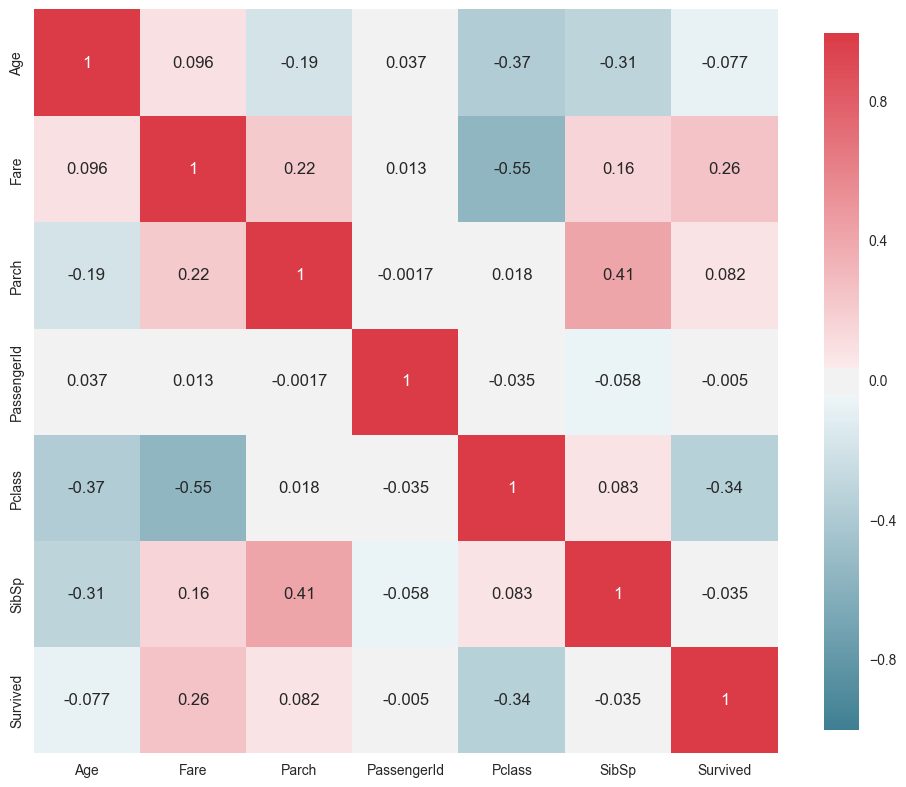

In [7]:
# genrating a heatmap for feature correlation
# leverage the code from An Interactive Data Science Tutorial
corr = trainData.corr()
_ , ax = plt.subplots(figsize=( 12 , 10 ))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={'shrink': .9}, 
    ax=ax, 
    annot = True, 
    annot_kws = {'fontsize': 12 }
)

#### Age v.s. Survived

It looks children has high possibility of surviving.

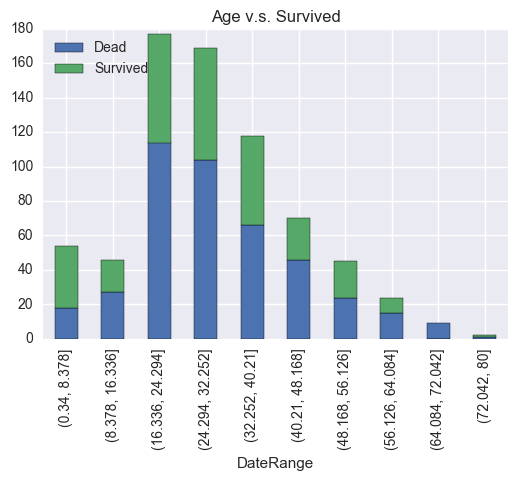

In [77]:
trainData['DateRange'] = pd.cut(trainData['Age'], bins=10)
ageCount = trainData['Survived'].groupby([trainData['DateRange'], trainData['Survived']]).count()
ageCount.unstack().plot(kind='bar', stacked=True)
plt.title('Age v.s. Survived')
plt.legend(['Dead', 'Survived'], loc=2)

#### Sex v.s. Survived
Female has high possibility of surviving.

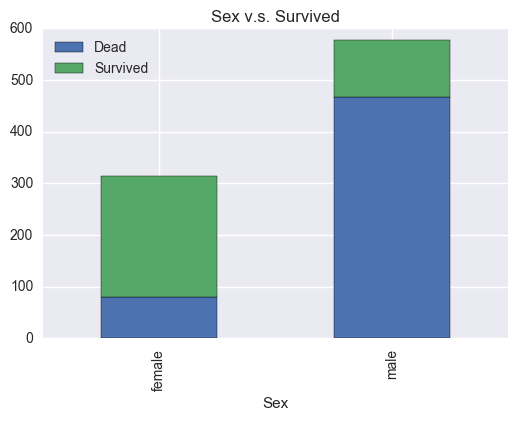

In [81]:
sexCount = trainData['Survived'].groupby([trainData['Sex'], trainData['Survived']]).count()
sexCount.unstack().plot(kind='bar', stacked=True)
plt.title('Sex v.s. Survived')
plt.legend(['Dead', 'Survived'], loc=2)

#### Fare v.s. Survived
Lower fare, lower possibility of surviving.

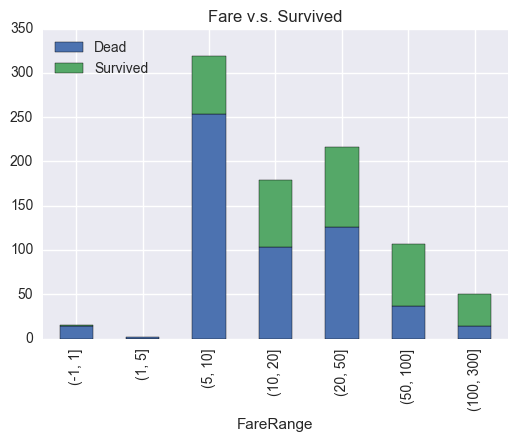

In [88]:
trainData['FareRange'] = pd.cut(trainData['Fare'], bins=[-1, 1, 5, 10, 20, 50, 100, 300, 500])
fareCount = trainData['Survived'].groupby([trainData['FareRange'], trainData['Survived']]).count()
fareCount.unstack().plot(kind='bar', stacked=True)
plt.title('Fare v.s. Survived')
plt.legend(['Dead', 'Survived'], loc=2)

#### SibSp and Parch v.s. Survived
Large and small family, low possibility of surviving. Core family with high possibility of surviving.

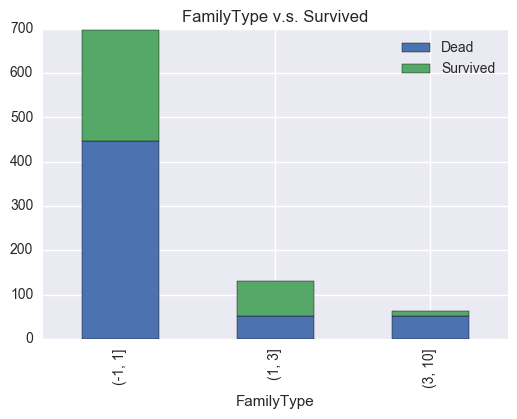

In [95]:
trainData['FamilySize'] = trainData['SibSp'] + trainData['Parch']
trainData['FamilyType'] = pd.cut(trainData['FamilySize'], bins=[-1, 1, 3, 10])
fareCount = trainData['Survived'].groupby([trainData['FamilyType'], trainData['Survived']]).count()
fareCount.unstack().plot(kind='bar', stacked=True)
plt.title('FamilyType v.s. Survived')
plt.legend(['Dead', 'Survived'], loc=1)

#### Pclass v.s. Survived

Class 3 has low possibility of surviving and class 1 has high possibility of surviving.

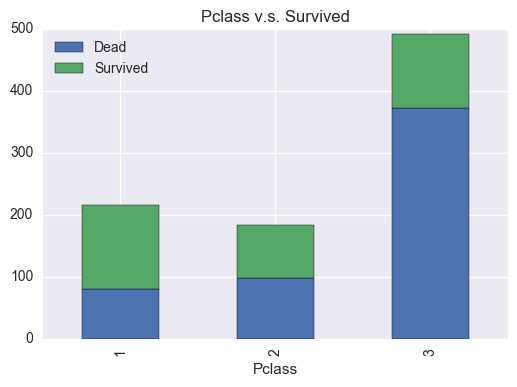

In [68]:
embarkedCount = trainData['Survived'].groupby([trainData['Pclass'], trainData['Survived']]).count()
embarkedCount.unstack().plot(kind='bar', stacked=True)
plt.title('Pclass v.s. Survived')
plt.legend(['Dead', 'Survived'], loc=2)

#### Embarked v.s. Survived

Looks like people emabrked from harbor S has a high posibility to die. Passengers embarked from harbor C has higher possibility of surviving than ones from other harbors.

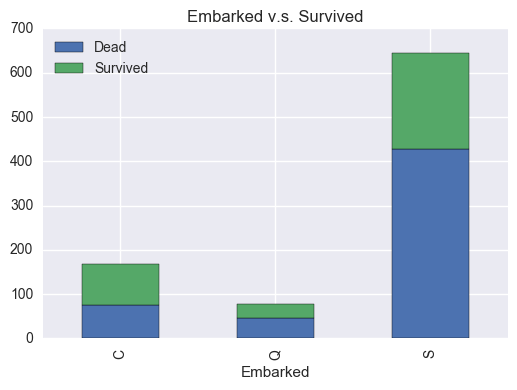

In [67]:
embarkedCount = trainData['Survived'].groupby([trainData['Embarked'], trainData['Survived']]).count()
embarkedCount.unstack().plot(kind='bar', stacked=True)
plt.title('Embarked v.s. Survived')
plt.legend(['Dead', 'Survived'], loc=2)

## 3. Data Preprocessing

In [96]:
trainData.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,DataRange,DateRange,FareRange,FamilySize,FamilyType
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(16.336, 24.294]","(16.336, 24.294]","(5, 10]",1,"(-1, 1]"
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(32.252, 40.21]","(32.252, 40.21]","(50, 100]",1,"(-1, 1]"
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(24.294, 32.252]","(24.294, 32.252]","(5, 10]",0,"(-1, 1]"
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(32.252, 40.21]","(32.252, 40.21]","(50, 100]",1,"(-1, 1]"
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(32.252, 40.21]","(32.252, 40.21]","(5, 10]",0,"(-1, 1]"


## 4. Feature Engineering

## 5. Modeling and Prediction

## 6. Evaluation and Tuning

## 7. Submission